# Predicting Future Healthcare Reimbursements

## Introduction

In this project, we delve into the critical task of developing a predictive model to forecast future Medicare reimbursements, aiding healthcare providers and policymakers in strategic decision-making and enhancing healthcare analytics.

**Problem Statement**

The healthcare sector faces ongoing challenges in effectively allocating resources and planning budgets, especially concerning uncertainties in Medicare reimbursements. Accurate prediction of future reimbursements is vital for optimizing resource allocation, financial planning, and proactive decision-making.

**Objective**

The primary goal of this project is to develop a *robust predictive model capable of accurately forecasting future Medicare reimbursements based on historical data and external factors*. By doing so, we aim to empower healthcare organizations with actionable insights to support optimal resource allocation, financial stability, and improved patient care.

**Dataset Description**

Our dataset comprises comprehensive information related to Medicare enrollees, reimbursement amounts, healthcare services, and demographic factors.

**Type of ML Task**

This project involves regression-based supervised machine learning as we endeavor to predict continuous values representing future Medicare reimbursements.

## Importing Essentials

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro

from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings 
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
df_state = pd.read_excel('pa_reimb_state_2014.xlsx')
df_state.head()

,State #,State name,Medicare enrollees (2014),Total Medicare reimbursements per enrollee (Parts A and B) (2014),Unnamed: 4,Hospital & skilled nursing facility reimbursements per enrollee (2014),Unnamed: 6,Physician reimbursements per enrollee (2014),Unnamed: 8,Outpatient facility reimbursements per enrollee (2014),Unnamed: 10,Home health agency reimbursements per enrollee (2014),Unnamed: 12,Hospice reimbursements per enrollee (2014),Unnamed: 14,Durable medical equipment reimbursements per enrollee (2014),Unnamed: 16
0,NaN,NaN,NaN,"Age, sex & race-adjusted","Price, age, sex & race-adjusted","Age, sex & race-adjusted","Price, age, sex & race-adjusted","Age, sex & race-adjusted","Price, age, sex & race-adjusted","Age, sex & race-adjusted","Price, age, sex & race-adjusted","Age, sex & race-adjusted","Price, age, sex & race-adjusted","Age, sex & race-adjusted","Price, age, sex & race-adjusted","Age, sex & race-adjusted","Price, age, sex & race-adjusted"
1,1.0,Alabama,494966.0,8680.93,9961.85,3447.21,4265.82,2578.5,2726.52,1351.84,1516.79,551.11,629.12,543.02,634.98,228.69,213.37
2,2.0,Alaska,56634.0,8702.62,6970.83,4101.69,3076.14,2334.08,1970.81,1660.47,1389.1,208.51,175.87,185.3,172.32,117.97,107.53
3,3.0,Arizona,507408.0,9068.12,8976.52,3652.01,3615.96,3211.26,3210.19,1211.14,1179.69,317.93,307.46,489.33,471.87,176.23,180.06
4,4.0,Arkansas,332791.0,8466.95,9544.49,3861.26,4616.55,2230.52,2342.91,1388.91,1538.26,409.23,458.16,342.15,365.25,234.63,226.04


In [3]:
df_county = pd.read_excel('pa_reimb_county_2014.xlsx')
df_county.head()

,County ID,County name,Medicare enrollees (2014),Total Medicare reimbursements per enrollee (Parts A and B) (2014),Unnamed: 4,Hospital & skilled nursing facility reimbursements per enrollee (2014),Unnamed: 6,Physician reimbursements per enrollee (2014),Unnamed: 8,Outpatient facility reimbursements per enrollee (2014),Unnamed: 10,Home health agency reimbursements per enrollee (2014),Unnamed: 12,Hospice reimbursements per enrollee (2014),Unnamed: 14,Durable medical equipment reimbursements per enrollee (2014),Unnamed: 16
0,NaN,NaN,NaN,"Age, sex & race-adjusted","Price, age, sex & race-adjusted","Age, sex & race-adjusted","Price, age, sex & race-adjusted","Age, sex & race-adjusted","Price, age, sex & race-adjusted","Age, sex & race-adjusted","Price, age, sex & race-adjusted","Age, sex & race-adjusted","Price, age, sex & race-adjusted","Age, sex & race-adjusted","Price, age, sex & race-adjusted","Age, sex & race-adjusted","Price, age, sex & race-adjusted"
1,1001.0,AL-Autauga County,4649.0,8498.6,9858.62,3223.91,4053.2,2371.46,2539.18,1711.69,1948.61,419.55,476.88,520.74,627.51,251.58,232.72
2,1003.0,AL-Baldwin County,22607.0,8028.73,9412.78,2809.21,3695.9,2689.56,2846.65,1309.54,1519.31,575.77,682.03,385.12,451.39,247.73,226.87
3,1005.0,AL-Barbour County,3037.0,8707.97,10117.09,3367.89,4167.67,2441.77,2609.6,1522.81,1769.72,538.92,628.08,613.4,731.4,255.88,235.11
4,1007.0,AL-Bibb County,1839.0,9809.13,10817.25,4100.45,4740.37,2559.38,2668.62,1672.08,1808.62,901.38,967.68,425.74,482.73,181.96,192.73


## Basic Data Cleaning
- Renaming columns to improve readability and clarity.
- Removing the first row to eliminate unnecessary or redundant data.

In [4]:
new_state_column_names = ['State_#', 'State_Name', 'Medicare_Enrollees_2014', 'Ttl_Mcr_Reim_P_E_14_ASRA', 'Ttl_Mcr_Reim_P_E_14_P_ASRA', 
                         'Hosp_SN_Reim_P_E_14_ASRA', 'Hosp_SN_Reim_P_E_14_P_ASRA', 'Phys_Reim_P_E_14_ASRA', 'Phys_Reim_P_E_14_P_ASRA', 
                         'Outp_Fac_Reim_P_E_14_ASRA', 'Outp_Fac_Reim_P_E_14_P_ASRA', 'HHA_Reim_P_E_14_ASRA', 'HHA_Reim_P_E_14_P_ASRA', 
                         'Hospice_Reim_P_E_14_ASRA', 'Hospice_Reim_P_E_14_P_ASRA', 'DME_Reim_P_E_14_ASRA', 'DME_Reim_P_E_14_P_ASRA']

new_county_column_names = ['County_ID', 'County_Name', 'Medicare_Enrollees_2014', 'Ttl_Mcr_Reim_P_E_14_ASRA', 'Ttl_Mcr_Reim_P_E_14_P_ASRA',
                         'Hosp_SN_Reim_P_E_14_ASRA', 'Hosp_SN_Reim_P_E_14_P_ASRA', 'Phys_Reim_P_E_14_ASRA', 'Phys_Reim_P_E_14_P_ASRA', 
                         'Outp_Fac_Reim_P_E_14_ASRA', 'Outp_Fac_Reim_P_E_14_P_ASRA','HHA_Reim_P_E_14_ASRA', 'HHA_Reim_P_E_14_P_ASRA', 
                         'Hospice_Reim_P_E_14_ASRA', 'Hospice_Reim_P_E_14_P_ASRA', 'DME_Reim_P_E_14_ASRA', 'DME_Reim_P_E_14_P_ASRA']

Abbreaviation:
- ASRA: Age, Sex, Race Adjusted
- P: Price
- Ttl_Mcr_Reim_P_E_14: Total Medicare Reimbursements Per Enrollee Parts A and B 2014
- Hosp_SN_Reim_P_E_14: Hospital Skilled Nursing Facility Reimbursements Per Enrollee 2014
- Phys_Reim_P_E_14: Physician Reimbursements Per Enrollee 2014
- Outp_Fac_Reim_P_E_14: Outpatient Facility Reimbursements Per Enrollee 2014
- HHA_Reim_P_E_14: Home Health Agency Reimbursements Per Enrollee 2014
- Hospice_Reim_P_E_14: Hospice Reimbursements Per Enrollee 2014
- DME_Reim_P_E_14: Durable Medical Equipment Reimbursements Per Enrollee 2014

In [5]:
df_state.columns = new_state_column_names
df_state = df_state.drop(0)
df_state.head()

,State_#,State_Name,Medicare_Enrollees_2014,Ttl_Mcr_Reim_P_E_14_ASRA,Ttl_Mcr_Reim_P_E_14_P_ASRA,Hosp_SN_Reim_P_E_14_ASRA,Hosp_SN_Reim_P_E_14_P_ASRA,Phys_Reim_P_E_14_ASRA,Phys_Reim_P_E_14_P_ASRA,Outp_Fac_Reim_P_E_14_ASRA,Outp_Fac_Reim_P_E_14_P_ASRA,HHA_Reim_P_E_14_ASRA,HHA_Reim_P_E_14_P_ASRA,Hospice_Reim_P_E_14_ASRA,Hospice_Reim_P_E_14_P_ASRA,DME_Reim_P_E_14_ASRA,DME_Reim_P_E_14_P_ASRA
1,1.0,Alabama,494966.0,8680.93,9961.85,3447.21,4265.82,2578.5,2726.52,1351.84,1516.79,551.11,629.12,543.02,634.98,228.69,213.37
2,2.0,Alaska,56634.0,8702.62,6970.83,4101.69,3076.14,2334.08,1970.81,1660.47,1389.1,208.51,175.87,185.3,172.32,117.97,107.53
3,3.0,Arizona,507408.0,9068.12,8976.52,3652.01,3615.96,3211.26,3210.19,1211.14,1179.69,317.93,307.46,489.33,471.87,176.23,180.06
4,4.0,Arkansas,332791.0,8466.95,9544.49,3861.26,4616.55,2230.52,2342.91,1388.91,1538.26,409.23,458.16,342.15,365.25,234.63,226.04
5,5.0,California,2148329.0,10506.05,8908.44,4798.8,3870.55,3104.05,2895.97,1494.53,1199.77,573.17,465.35,367.03,305.7,164.09,165.43


In [6]:
df_county.columns = new_county_column_names
df_county = df_county.drop(0)
df_county.head()

,County_ID,County_Name,Medicare_Enrollees_2014,Ttl_Mcr_Reim_P_E_14_ASRA,Ttl_Mcr_Reim_P_E_14_P_ASRA,Hosp_SN_Reim_P_E_14_ASRA,Hosp_SN_Reim_P_E_14_P_ASRA,Phys_Reim_P_E_14_ASRA,Phys_Reim_P_E_14_P_ASRA,Outp_Fac_Reim_P_E_14_ASRA,Outp_Fac_Reim_P_E_14_P_ASRA,HHA_Reim_P_E_14_ASRA,HHA_Reim_P_E_14_P_ASRA,Hospice_Reim_P_E_14_ASRA,Hospice_Reim_P_E_14_P_ASRA,DME_Reim_P_E_14_ASRA,DME_Reim_P_E_14_P_ASRA
1,1001.0,AL-Autauga County,4649.0,8498.6,9858.62,3223.91,4053.2,2371.46,2539.18,1711.69,1948.61,419.55,476.88,520.74,627.51,251.58,232.72
2,1003.0,AL-Baldwin County,22607.0,8028.73,9412.78,2809.21,3695.9,2689.56,2846.65,1309.54,1519.31,575.77,682.03,385.12,451.39,247.73,226.87
3,1005.0,AL-Barbour County,3037.0,8707.97,10117.09,3367.89,4167.67,2441.77,2609.6,1522.81,1769.72,538.92,628.08,613.4,731.4,255.88,235.11
4,1007.0,AL-Bibb County,1839.0,9809.13,10817.25,4100.45,4740.37,2559.38,2668.62,1672.08,1808.62,901.38,967.68,425.74,482.73,181.96,192.73
5,1009.0,AL-Blount County,4408.0,8921.75,10035.61,3533.54,4229.56,2643.92,2764.35,1412.28,1563.9,554.54,611.15,587.87,681.73,210.47,229.42


## EDA (Exploratory Data Analysis)
- for two datasets separately :
    - df_state
    - df_county

Performing EDA and Data Wrangling concurrently, So as to iteratively explore the data, identify data quality issues, and address them through preprocessing steps, ensuring that our analysis is based on clean and reliable data.

In [7]:
numerical_cols = ['Ttl_Mcr_Reim_P_E_14_ASRA', 'Ttl_Mcr_Reim_P_E_14_P_ASRA', 'Hosp_SN_Reim_P_E_14_ASRA', 
                  'Hosp_SN_Reim_P_E_14_P_ASRA', 'Phys_Reim_P_E_14_ASRA', 'Phys_Reim_P_E_14_P_ASRA', 
                  'Outp_Fac_Reim_P_E_14_ASRA', 'Outp_Fac_Reim_P_E_14_P_ASRA', 'HHA_Reim_P_E_14_ASRA',
                  'HHA_Reim_P_E_14_P_ASRA','Hospice_Reim_P_E_14_ASRA','Hospice_Reim_P_E_14_P_ASRA',
                  'DME_Reim_P_E_14_ASRA','DME_Reim_P_E_14_P_ASRA']

### EDA for df_state

In [8]:
rows = df_state.shape[0]
column = df_state.shape[1]
print(f"{rows} Rows and {column} Columns")
df_state.shape

52 Rows and 17 Columns


(52, 17)

In [9]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 1 to 52
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State_#                      52 non-null     float64
 1   State_Name                   52 non-null     object 
 2   Medicare_Enrollees_2014      52 non-null     float64
 3   Ttl_Mcr_Reim_P_E_14_ASRA     52 non-null     object 
 4   Ttl_Mcr_Reim_P_E_14_P_ASRA   52 non-null     object 
 5   Hosp_SN_Reim_P_E_14_ASRA     52 non-null     object 
 6   Hosp_SN_Reim_P_E_14_P_ASRA   52 non-null     object 
 7   Phys_Reim_P_E_14_ASRA        52 non-null     object 
 8   Phys_Reim_P_E_14_P_ASRA      52 non-null     object 
 9   Outp_Fac_Reim_P_E_14_ASRA    52 non-null     object 
 10  Outp_Fac_Reim_P_E_14_P_ASRA  52 non-null     object 
 11  HHA_Reim_P_E_14_ASRA         52 non-null     object 
 12  HHA_Reim_P_E_14_P_ASRA       52 non-null     object 
 13  Hospice_Reim_P_E_14_AS

In [10]:
df_state.duplicated().sum()

0

**Insights :**
- no nulls values 
- Most of the columns have inappropriate datatypes
- no duplicates 

#### Handling Datatype Error
- convert object-type columns to float64 for numeric data

In [11]:
df_state[numerical_cols] = df_state[numerical_cols].apply(pd.to_numeric, errors='coerce')

In [12]:
df_state.info() #verifying

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 1 to 52
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State_#                      52 non-null     float64
 1   State_Name                   52 non-null     object 
 2   Medicare_Enrollees_2014      52 non-null     float64
 3   Ttl_Mcr_Reim_P_E_14_ASRA     52 non-null     float64
 4   Ttl_Mcr_Reim_P_E_14_P_ASRA   52 non-null     float64
 5   Hosp_SN_Reim_P_E_14_ASRA     52 non-null     float64
 6   Hosp_SN_Reim_P_E_14_P_ASRA   52 non-null     float64
 7   Phys_Reim_P_E_14_ASRA        52 non-null     float64
 8   Phys_Reim_P_E_14_P_ASRA      52 non-null     float64
 9   Outp_Fac_Reim_P_E_14_ASRA    52 non-null     float64
 10  Outp_Fac_Reim_P_E_14_P_ASRA  52 non-null     float64
 11  HHA_Reim_P_E_14_ASRA         52 non-null     float64
 12  HHA_Reim_P_E_14_P_ASRA       52 non-null     float64
 13  Hospice_Reim_P_E_14_AS

#### Descriptive Statsitics

In [13]:
df_state.describe()

,State_#,Medicare_Enrollees_2014,Ttl_Mcr_Reim_P_E_14_ASRA,Ttl_Mcr_Reim_P_E_14_P_ASRA,Hosp_SN_Reim_P_E_14_ASRA,Hosp_SN_Reim_P_E_14_P_ASRA,Phys_Reim_P_E_14_ASRA,Phys_Reim_P_E_14_P_ASRA,Outp_Fac_Reim_P_E_14_ASRA,Outp_Fac_Reim_P_E_14_P_ASRA,HHA_Reim_P_E_14_ASRA,HHA_Reim_P_E_14_P_ASRA,Hospice_Reim_P_E_14_ASRA,Hospice_Reim_P_E_14_P_ASRA,DME_Reim_P_E_14_ASRA,DME_Reim_P_E_14_P_ASRA
count,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,27.730769,1.003767e+06,9041.840962,9081.429231,4016.195962,4026.762692,2379.824038,2402.049423,1666.437500,1665.982885,451.268269,453.544808,342.825577,350.841538,188.853269,186.532308
std,18.229598,3.579463e+06,966.118427,1029.817742,531.078024,545.499599,531.713949,480.591970,286.345313,294.338873,207.025845,220.585547,112.968403,128.649418,35.086175,34.089326
min,1.000000,4.505100e+04,7366.280000,6970.830000,3096.410000,3036.500000,1442.950000,1450.430000,1125.220000,1019.850000,95.840000,95.420000,119.590000,134.550000,92.570000,89.930000
25%,13.750000,1.666012e+05,8283.730000,8325.985000,3551.077500,3623.837500,2033.115000,2010.387500,1438.052500,1467.955000,316.847500,306.745000,269.420000,269.222500,167.775000,165.237500
50%,26.500000,3.719365e+05,8855.395000,9158.310000,3932.410000,3952.685000,2327.775000,2381.705000,1627.545000,1578.545000,421.495000,437.345000,332.630000,341.835000,192.260000,189.230000
75%,39.500000,6.690788e+05,9823.512500,9872.295000,4428.210000,4489.695000,2641.772500,2693.287500,1840.255000,1875.192500,574.002500,546.822500,428.987500,410.690000,209.727500,204.997500
max,99.000000,2.609794e+07,11059.680000,11221.220000,5269.950000,5111.560000,3792.780000,3699.540000,2447.960000,2434.300000,1011.300000,1038.820000,576.850000,634.980000,263.950000,260.300000


In [14]:
df_state['State_Name'].nunique()

52

**Interpretation**
- The average values (**mean**) for most reimbursements are relatively high, ranging from $1665.98 to  4551.27. This implies that *healthcare costs can be substantial*, even after adjusting for age, sex, and race (ASRA).
- High **standard deviations** across all reimbursements highlight significant variability in costs among states. This suggests that the *average reimbursement amounts don't necessarily represent the typical experience for many enrollees within a state*.
- The **minimum and maximum values** for each reimbursement type show a considerable range, suggesting that *some states have substantially lower overall healthcare costs compared to others*

Overall, values across different reimbursements emphasizes the *heterogeneity of healthcare costs across states*

#### Data Visualization

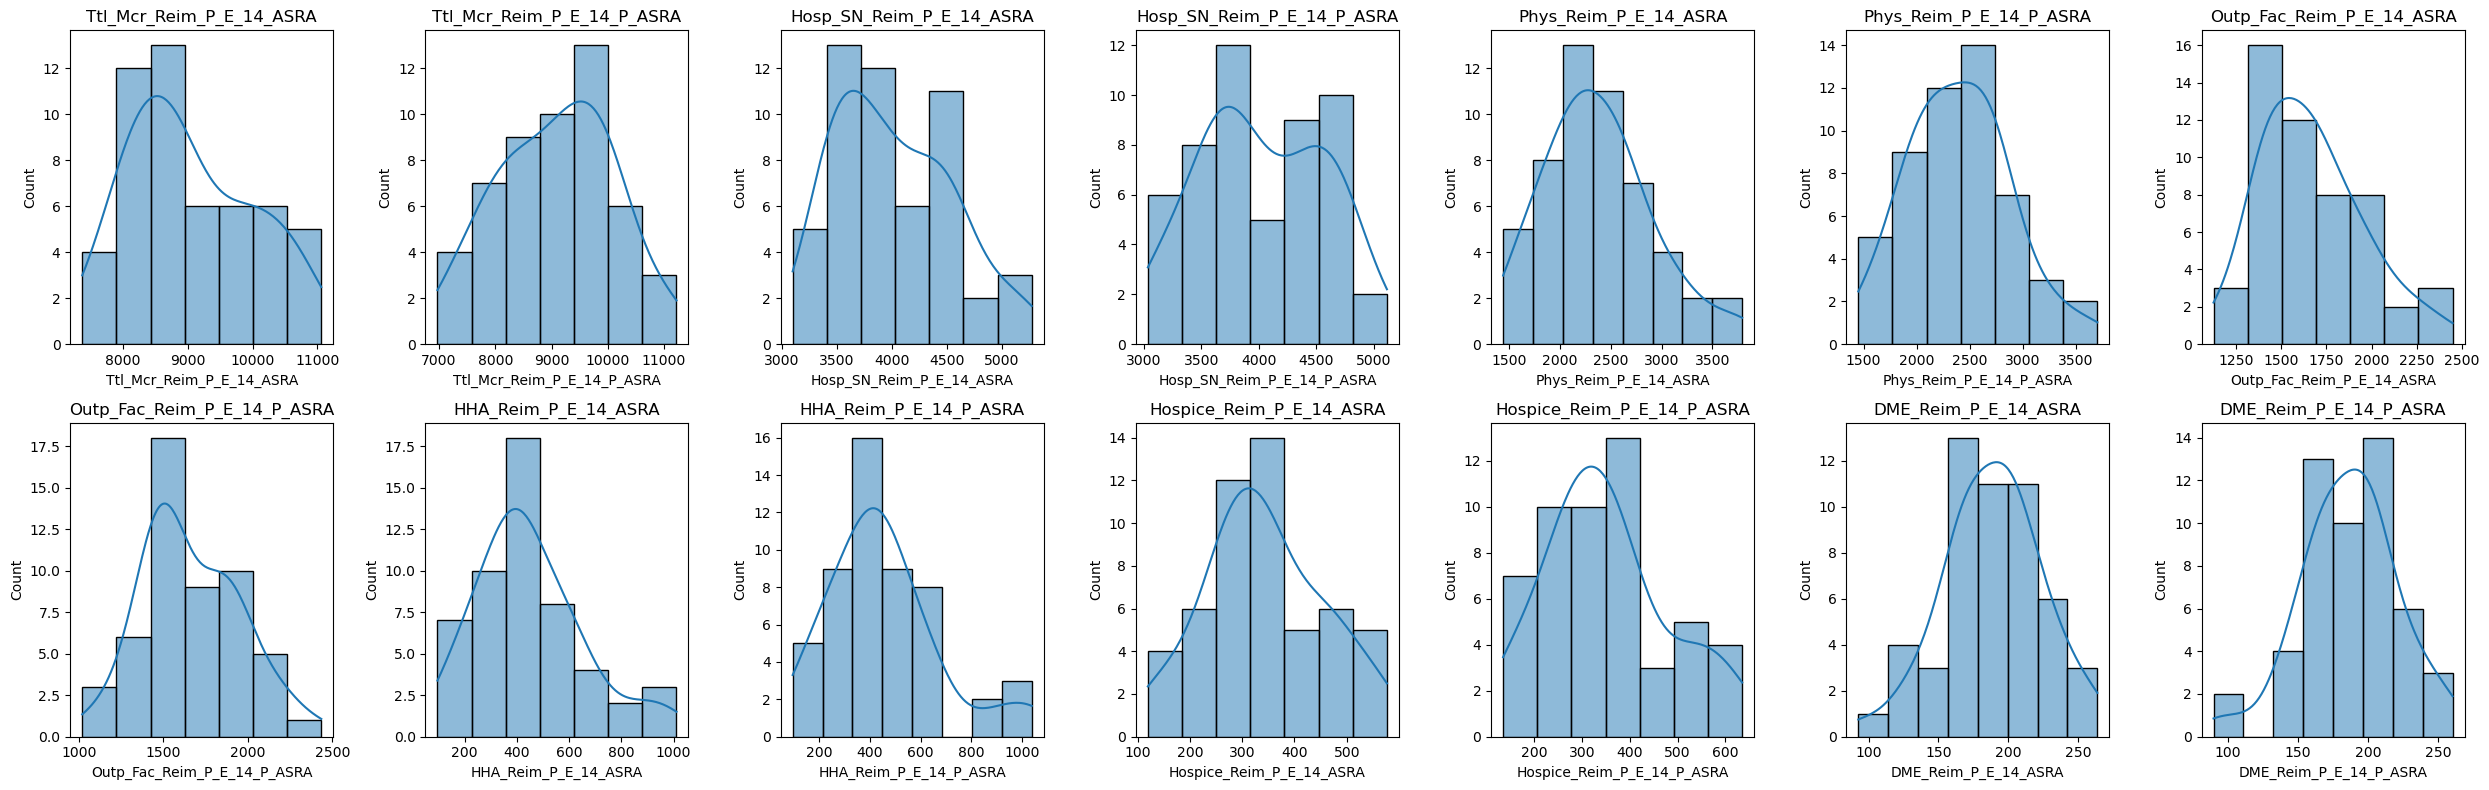

In [15]:
plt.figure(figsize=(25, 8))

for i, column in enumerate(numerical_cols):
    plt.subplot(2, len(numerical_cols)//2, i+1)
    sns.histplot(df_state[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

**Interpretation**
- Most of the healthcare reimbursements in the dataset are **skewed to the right**, i.e. there are a significantly higher number of enrollees with lower reimbursements compared to those with higher reimbursements.
- Particularly Hospice Reimbursement, show a **few outliers with very high reimbursement** amounts compared to the majority of enrollees. This suggests that a **small number of individuals may have significantly higher healthcare needs**.

Overall, majority have lower reimbursements, there are outliers with high costs, and the number of enrollees doesn't necessarily dictate the total reimbursement amount.


#### Correlation

- correlation matrix of target variable (Ttl_Mcr_Reim_P_E_14_P_ASRA) and all other variable
  To check which factor is affecting our target variable

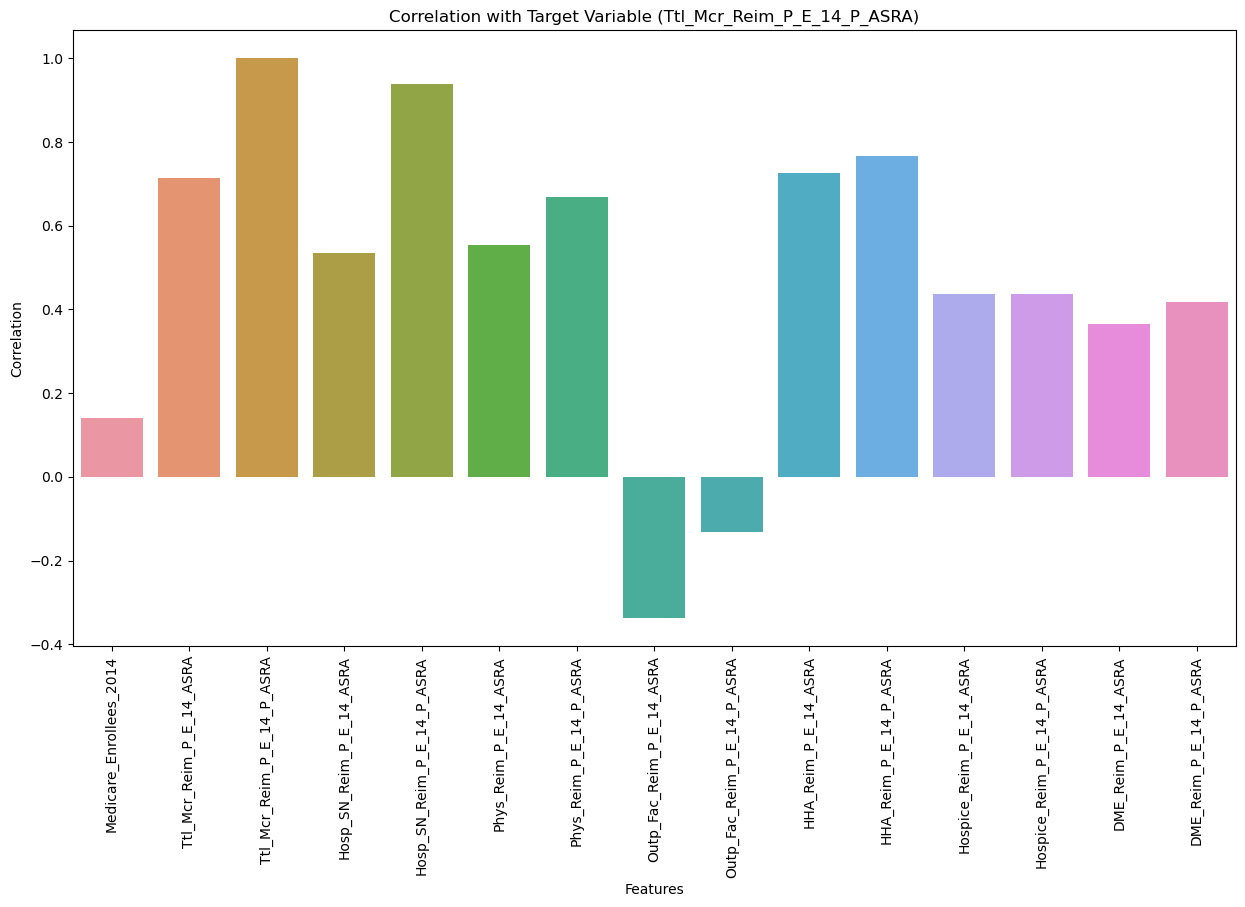

In [16]:
correlation_with_target = df_state[['Medicare_Enrollees_2014']+ numerical_cols].corrwith(df_state['Ttl_Mcr_Reim_P_E_14_P_ASRA'])

plt.figure(figsize=(15, 8))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.title('Correlation with Target Variable (Ttl_Mcr_Reim_P_E_14_P_ASRA)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90) 
plt.show()

**Strong Positive Correlations**:
 - Hosp_SN_Reim_P_E_14_P_ASRA (Hospital Skilled Nursing)
 - Phys_Reim_P_E_14_P_ASRA (Physician Reimbursement)
 - Outp_Fac_Reim_P_E_14_P_ASRA (Outpatient Facility Reimbursement)

**Moderate Positive Correlation**:
 - HHA_Reim_P_E_14_P_ASRA (Home Health Agency Reimbursement)

**Weak Positive Correlation**:
 - Medicare_Enrollees_2014 

**Interpretation:**
 - States with **higher reimbursements** for *hospital skilled nursing facilities, physicians, and outpatient facilities* tend to have **higher total Medicare reimbursements per enrollee** as well. 
 - There is a **weaker positive correlation** between *Home Health Agency Reimbursement and total Medicare reimbursement*. This means there might be a **slight association between higher home health agency costs and higher overall reimbursements**, but the link is not as strong as with the other categories.
- **Weak positive correlation** between the number of *Medicare enrollees and total reimbursements*, it's crucial to remember that other factors like healthcare costs and utilization play a much more significant role in driving total cost variations across states.

### EDA for df_county

In [17]:
rows = df_county.shape[0]
column = df_county.shape[1]
print(f"{rows} Rows and {column} Columns")
df_county.shape

3144 Rows and 17 Columns


(3144, 17)

In [18]:
df_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 1 to 3144
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   County_ID                    3144 non-null   float64
 1   County_Name                  3144 non-null   object 
 2   Medicare_Enrollees_2014      3144 non-null   float64
 3   Ttl_Mcr_Reim_P_E_14_ASRA     3142 non-null   object 
 4   Ttl_Mcr_Reim_P_E_14_P_ASRA   3142 non-null   object 
 5   Hosp_SN_Reim_P_E_14_ASRA     3130 non-null   object 
 6   Hosp_SN_Reim_P_E_14_P_ASRA   3130 non-null   object 
 7   Phys_Reim_P_E_14_ASRA        3142 non-null   object 
 8   Phys_Reim_P_E_14_P_ASRA      3142 non-null   object 
 9   Outp_Fac_Reim_P_E_14_ASRA    3142 non-null   object 
 10  Outp_Fac_Reim_P_E_14_P_ASRA  3142 non-null   object 
 11  HHA_Reim_P_E_14_ASRA         2996 non-null   object 
 12  HHA_Reim_P_E_14_P_ASRA       2996 non-null   object 
 13  Hospice_Reim_P_E_1

In [19]:
df_county['County_Name'].duplicated().sum()

0

**Insights :**
- few columns have *null values* 
- And most of the columns have *inappropriate datatypes*
- No Duplicates

#### Handling Datatype Error

- convert object-type columns to float64 for numeric data

In [20]:
df_county[numerical_cols] = df_county[numerical_cols].apply(pd.to_numeric, errors='coerce')

In [21]:
df_county.dtypes #verifying

County_ID                      float64
County_Name                     object
Medicare_Enrollees_2014        float64
Ttl_Mcr_Reim_P_E_14_ASRA       float64
Ttl_Mcr_Reim_P_E_14_P_ASRA     float64
Hosp_SN_Reim_P_E_14_ASRA       float64
Hosp_SN_Reim_P_E_14_P_ASRA     float64
Phys_Reim_P_E_14_ASRA          float64
Phys_Reim_P_E_14_P_ASRA        float64
Outp_Fac_Reim_P_E_14_ASRA      float64
Outp_Fac_Reim_P_E_14_P_ASRA    float64
HHA_Reim_P_E_14_ASRA           float64
HHA_Reim_P_E_14_P_ASRA         float64
Hospice_Reim_P_E_14_ASRA       float64
Hospice_Reim_P_E_14_P_ASRA     float64
DME_Reim_P_E_14_ASRA           float64
DME_Reim_P_E_14_P_ASRA         float64
dtype: object

#### Handling Null Values

In [22]:
df_county.isnull().sum()

County_ID                        0
County_Name                      0
Medicare_Enrollees_2014          0
Ttl_Mcr_Reim_P_E_14_ASRA         2
Ttl_Mcr_Reim_P_E_14_P_ASRA       2
Hosp_SN_Reim_P_E_14_ASRA        14
Hosp_SN_Reim_P_E_14_P_ASRA      14
Phys_Reim_P_E_14_ASRA            2
Phys_Reim_P_E_14_P_ASRA          2
Outp_Fac_Reim_P_E_14_ASRA        2
Outp_Fac_Reim_P_E_14_P_ASRA      2
HHA_Reim_P_E_14_ASRA           148
HHA_Reim_P_E_14_P_ASRA         148
Hospice_Reim_P_E_14_ASRA       265
Hospice_Reim_P_E_14_P_ASRA     265
DME_Reim_P_E_14_ASRA             5
DME_Reim_P_E_14_P_ASRA           5
dtype: int64

##### Feature Engineering

Creating Features to match the dataframe df_county with df_state. <br>
So that i can impute nulls in df_county with the values of df_state


In [23]:
df_county['state_abb'] = df_county['County_Name'].str[:2]
df_county.insert(0, 'state_abb', df_county.pop('state_abb'))

df_county['County_Name'] = df_county['County_Name'].str[3:]

In [24]:
state_abb_count = df_county['state_abb'].nunique()
state_name_count = df_county['state_abb'].nunique()

print(f"{state_abb_count} state_abb in df_county & {state_name_count} states in df_state")

52 state_abb in df_county & 52 states in df_state


In [25]:
#Mapping the state_abb with State_Name
print(df_county['state_abb'].unique())
df_state['State_Name'].unique()

['AL' 'AK' nan 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY' 'US']


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'United States'],
      dtype=object)

In [26]:
state_mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'DC': 'District of Columbia',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois',
    'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana',
    'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota',
    'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon',
    'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia',
    'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'US': 'United States'
}

In [27]:
df_county['State_Name'] = df_county['state_abb'].map(state_mapping)
df_county.insert(1, 'State_Name', df_county.pop('State_Name'))

In [28]:
df_county = df_county.drop('state_abb', axis=1)

In [29]:
df_county.isnull().sum()

State_Name                       6
County_ID                        0
County_Name                      6
Medicare_Enrollees_2014          0
Ttl_Mcr_Reim_P_E_14_ASRA         2
Ttl_Mcr_Reim_P_E_14_P_ASRA       2
Hosp_SN_Reim_P_E_14_ASRA        14
Hosp_SN_Reim_P_E_14_P_ASRA      14
Phys_Reim_P_E_14_ASRA            2
Phys_Reim_P_E_14_P_ASRA          2
Outp_Fac_Reim_P_E_14_ASRA        2
Outp_Fac_Reim_P_E_14_P_ASRA      2
HHA_Reim_P_E_14_ASRA           148
HHA_Reim_P_E_14_P_ASRA         148
Hospice_Reim_P_E_14_ASRA       265
Hospice_Reim_P_E_14_P_ASRA     265
DME_Reim_P_E_14_ASRA             5
DME_Reim_P_E_14_P_ASRA           5
dtype: int64

##### Droping Rows where State_Name is Null

In [30]:
df_county = df_county.dropna(subset=['State_Name'])

In [31]:
df_county.shape

(3138, 18)

##### Mapping columns to impute null values from df_state

In [32]:
columns_to_map = ['Ttl_Mcr_Reim_P_E_14_ASRA', 'Ttl_Mcr_Reim_P_E_14_P_ASRA', 'Hosp_SN_Reim_P_E_14_ASRA', 
                  'Hosp_SN_Reim_P_E_14_P_ASRA', 'Phys_Reim_P_E_14_ASRA', 'Phys_Reim_P_E_14_P_ASRA', 
                  'Outp_Fac_Reim_P_E_14_ASRA', 'Outp_Fac_Reim_P_E_14_P_ASRA', 'HHA_Reim_P_E_14_ASRA', 
                  'HHA_Reim_P_E_14_P_ASRA', 'Hospice_Reim_P_E_14_ASRA', 'Hospice_Reim_P_E_14_P_ASRA', 
                  'DME_Reim_P_E_14_ASRA', 'DME_Reim_P_E_14_P_ASRA']

In [33]:
df_state.set_index('State_Name', inplace=True)

In [34]:
filled_values = pd.DataFrame(index=df_county.index, columns=columns_to_map)

##### Imputing null values with the values of df_state dataframe

In [35]:
# Iterating over each column in columns_to_map and filling null values individually from df_state
for col in columns_to_map:
    filled_values[col] = df_county.apply(lambda row: row[col] if pd.notna(row[col]) else df_state.at[row['State_Name'], col], axis=1)

df_county[columns_to_map] = filled_values

In [36]:
df_county.isnull().sum()

State_Name                     0
County_ID                      0
County_Name                    0
Medicare_Enrollees_2014        0
Ttl_Mcr_Reim_P_E_14_ASRA       0
Ttl_Mcr_Reim_P_E_14_P_ASRA     0
Hosp_SN_Reim_P_E_14_ASRA       0
Hosp_SN_Reim_P_E_14_P_ASRA     0
Phys_Reim_P_E_14_ASRA          0
Phys_Reim_P_E_14_P_ASRA        0
Outp_Fac_Reim_P_E_14_ASRA      0
Outp_Fac_Reim_P_E_14_P_ASRA    0
HHA_Reim_P_E_14_ASRA           0
HHA_Reim_P_E_14_P_ASRA         0
Hospice_Reim_P_E_14_ASRA       0
Hospice_Reim_P_E_14_P_ASRA     0
DME_Reim_P_E_14_ASRA           0
DME_Reim_P_E_14_P_ASRA         0
dtype: int64

#### Descriptive Statsitics

In [37]:
df_county.shape

(3138, 18)

In [38]:
df_county.describe()

,County_ID,Medicare_Enrollees_2014,Ttl_Mcr_Reim_P_E_14_ASRA,Ttl_Mcr_Reim_P_E_14_P_ASRA,Hosp_SN_Reim_P_E_14_ASRA,Hosp_SN_Reim_P_E_14_P_ASRA,Phys_Reim_P_E_14_ASRA,Phys_Reim_P_E_14_P_ASRA,Outp_Fac_Reim_P_E_14_ASRA,Outp_Fac_Reim_P_E_14_P_ASRA,HHA_Reim_P_E_14_ASRA,HHA_Reim_P_E_14_P_ASRA,Hospice_Reim_P_E_14_ASRA,Hospice_Reim_P_E_14_P_ASRA,DME_Reim_P_E_14_ASRA,DME_Reim_P_E_14_P_ASRA
count,3138.000000,3.138000e+03,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000
mean,30464.641810,1.663153e+04,8956.213569,9400.826941,4016.874930,4257.593556,2130.676546,2209.035972,1822.225025,1903.918324,461.608343,487.665443,341.337909,370.925774,214.808843,204.906702
std,15180.515745,4.661421e+05,1279.915509,1493.685938,774.436025,896.069084,546.233032,533.121045,549.346610,576.524314,326.439765,356.254698,186.910029,211.123750,61.796732,56.611859
min,1001.000000,1.000000e+01,4137.950000,4443.240000,1579.000000,1651.290000,791.620000,818.250000,624.740000,664.260000,27.730000,23.970000,13.210000,12.710000,17.020000,14.760000
25%,19003.500000,1.410250e+03,8110.630000,8395.107500,3481.960000,3651.372500,1762.732500,1834.515000,1443.910000,1503.287500,246.197500,255.255000,205.697500,219.302500,173.140000,168.895000
50%,29184.000000,2.947500e+03,8830.630000,9352.300000,3928.710000,4186.735000,2107.095000,2205.005000,1696.985000,1789.740000,381.125000,395.895000,310.570000,331.540000,207.815000,197.905000
75%,45086.500000,7.259500e+03,9692.867500,10282.217500,4447.222500,4775.667500,2457.147500,2549.887500,2072.307500,2161.607500,576.342500,608.617500,446.285000,491.890000,246.395000,231.730000
max,99999.000000,2.609794e+07,15034.460000,18390.100000,8680.370000,11738.530000,4821.870000,4622.110000,5433.390000,5702.390000,2888.710000,3022.530000,1677.560000,1842.020000,660.760000,634.470000


In [39]:
df_county[['County_Name','State_Name']].nunique()

County_Name    1871
State_Name       52
dtype: int64

**Interpretation**
- The **mean values** for most reimbursement variables are relatively high, ranging from $1665.98 to 4551.27. This suggests that **healthcare costs can be substantial**, even after adjusting for age, sex, and race. Also,  The** averag**e number of Medicare enrollees** per county is 30,46**4
- High **standard deviations** across all reimbursements highlight significant variability in costs among counties.
- The **minimum and mavalues** for each reimbursement type show a considerable range, suggesting that some counties have **substantially lower overall healthcare costs compared to others**
- The presence of **1871 unique county** names and **52 unique state** names confirms that the data covers a **wide range of geographic location**.


#### Normality Test for Numerical Variables

##### Hypothesis Testing 
- to check whether numerical variable follow Guassian distribution or not

In [40]:
for col in numerical_cols:
    stat, p = shapiro(df_county[col])
    print(f'{col}: p-value = {p}')

Ttl_Mcr_Reim_P_E_14_ASRA: p-value = 5.0133901506107416e-20
Ttl_Mcr_Reim_P_E_14_P_ASRA: p-value = 1.956616699173505e-13
Hosp_SN_Reim_P_E_14_ASRA: p-value = 8.419194277797046e-27
Hosp_SN_Reim_P_E_14_P_ASRA: p-value = 1.9460528000032923e-24
Phys_Reim_P_E_14_ASRA: p-value = 1.9187880063813137e-21
Phys_Reim_P_E_14_P_ASRA: p-value = 2.2567779242588237e-11
Outp_Fac_Reim_P_E_14_ASRA: p-value = 2.3962343869800804e-40
Outp_Fac_Reim_P_E_14_P_ASRA: p-value = 2.4803061291263264e-38
HHA_Reim_P_E_14_ASRA: p-value = 0.0
HHA_Reim_P_E_14_P_ASRA: p-value = 0.0
Hospice_Reim_P_E_14_ASRA: p-value = 1.5728368109560343e-34
Hospice_Reim_P_E_14_P_ASRA: p-value = 1.0428658232251523e-37
DME_Reim_P_E_14_ASRA: p-value = 5.515854897165718e-31
DME_Reim_P_E_14_P_ASRA: p-value = 8.520748962797898e-34


**Interpretation**
- All the p-values are significantly less than 0.05, indicating that we reject the null hypothesis of normality for all variables. Therefore, none of the variables appear to follow a Gaussian (normal) distribution.

#### Correlation
- correlation matrix of target variable (Ttl_Mcr_Reim_P_E_14_P_ASRA) and all other variable To check which factor is affecting our target variable

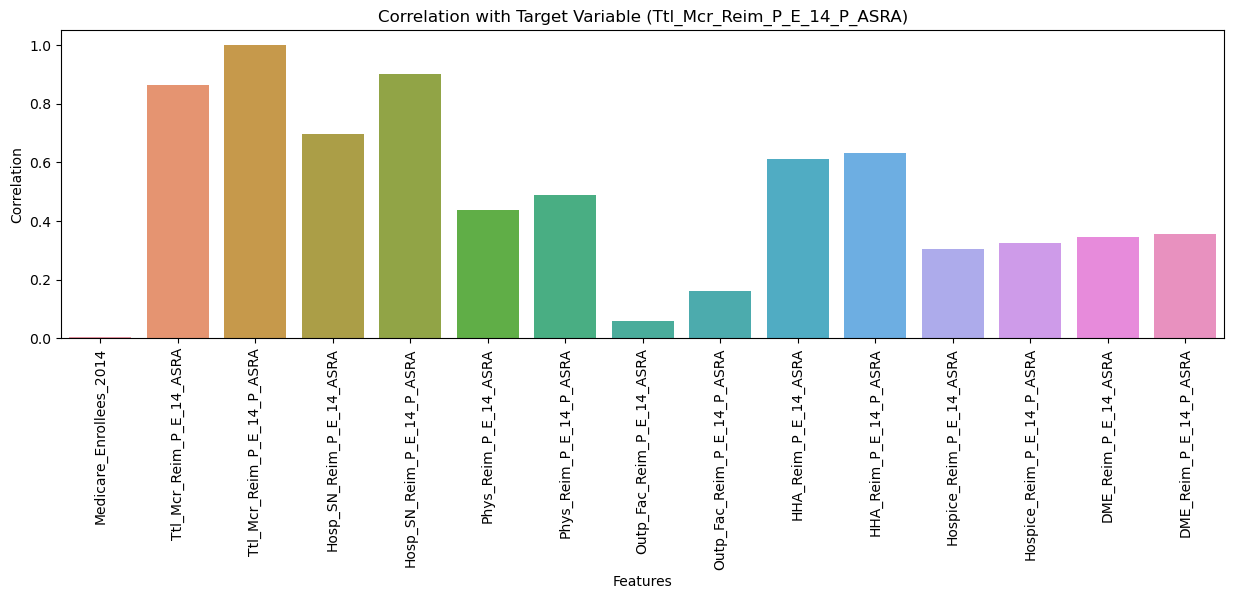

In [41]:
correlation_with_target = df_county[['Medicare_Enrollees_2014']+ numerical_cols].corrwith(df_county['Ttl_Mcr_Reim_P_E_14_P_ASRA'])

plt.figure(figsize=(15, 4))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.title('Correlation with Target Variable (Ttl_Mcr_Reim_P_E_14_P_ASRA)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90) 
plt.show()

 **Interpretation:** <br>
Overall, weak positive correlations between the target variable (Ttl_Mcr_Reim_P_E_14_P_ASRA) and several other variables. This means that counties with **higher values in these variables tend to have slightly higher total Medicare reimbursements** per enrollee. 

- Medicare_Enrollees_2014: Counties with a higher number of enrollees might have slightly higher overall costs, but the correlation is weak, implying other factors are likely at play.
- Reimbursement variables for specific healthcare services (Hospital, Physician, Outpatient, Home Health) show weak positive correlations, suggesting that counties with higher spending in these areas might have slightly higher total costs, but the relationships are not strong.

#### Final Dataset 

In [42]:
df_county

,State_Name,County_ID,County_Name,Medicare_Enrollees_2014,Ttl_Mcr_Reim_P_E_14_ASRA,Ttl_Mcr_Reim_P_E_14_P_ASRA,Hosp_SN_Reim_P_E_14_ASRA,Hosp_SN_Reim_P_E_14_P_ASRA,Phys_Reim_P_E_14_ASRA,Phys_Reim_P_E_14_P_ASRA,Outp_Fac_Reim_P_E_14_ASRA,Outp_Fac_Reim_P_E_14_P_ASRA,HHA_Reim_P_E_14_ASRA,HHA_Reim_P_E_14_P_ASRA,Hospice_Reim_P_E_14_ASRA,Hospice_Reim_P_E_14_P_ASRA,DME_Reim_P_E_14_ASRA,DME_Reim_P_E_14_P_ASRA
1,Alabama,1001.0,Autauga County,4649.0,8498.60,9858.62,3223.91,4053.20,2371.46,2539.18,1711.69,1948.61,419.55,476.88,520.74,627.51,251.58,232.72
2,Alabama,1003.0,Baldwin County,22607.0,8028.73,9412.78,2809.21,3695.90,2689.56,2846.65,1309.54,1519.31,575.77,682.03,385.12,451.39,247.73,226.87
3,Alabama,1005.0,Barbour County,3037.0,8707.97,10117.09,3367.89,4167.67,2441.77,2609.60,1522.81,1769.72,538.92,628.08,613.40,731.40,255.88,235.11
4,Alabama,1007.0,Bibb County,1839.0,9809.13,10817.25,4100.45,4740.37,2559.38,2668.62,1672.08,1808.62,901.38,967.68,425.74,482.73,181.96,192.73
5,Alabama,1009.0,Blount County,4408.0,8921.75,10035.61,3533.54,4229.56,2643.92,2764.35,1412.28,1563.90,554.54,611.15,587.87,681.73,210.47,229.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,Wyoming,56039.0,Teton County,2268.0,7785.43,7114.08,3421.10,2747.99,2155.31,2182.88,1628.40,1594.82,201.62,194.01,125.58,127.79,164.26,158.57
3141,Wyoming,56041.0,Uinta County,1709.0,8138.14,7856.70,3854.64,3615.60,1832.84,1819.05,1403.00,1381.70,536.52,524.38,202.51,214.82,317.72,305.68
3142,Wyoming,56043.0,Washakie County,1465.0,8251.25,8014.82,4057.12,3921.70,1632.02,1613.11,2056.86,2003.48,131.74,128.78,128.40,134.55,318.86,294.05
3143,Wyoming,56045.0,Weston County,1092.0,7647.56,7637.86,3398.88,3454.09,1441.57,1453.38,2207.11,2147.58,252.39,245.66,128.40,134.55,346.49,335.90


## Model Building 

### Deciding Variables

In [43]:
X= df_county.drop('Ttl_Mcr_Reim_P_E_14_P_ASRA', axis=1)            #Independent Variables
y= df_county['Ttl_Mcr_Reim_P_E_14_P_ASRA']                         #Dependent Variable

### Spliting the data

In [44]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.2,random_state=42)

### Encoding 

In [45]:
X_train[['State_Name','County_Name']]

,State_Name,County_Name
2791,Utah,Millard County
1798,New Mexico,Chaves County
2832,Virginia,Botetourt County
1064,Kentucky,Logan County
227,California,San Mateo County
...,...,...
3099,Wisconsin,Price County
1102,Kentucky,Taylor County
1137,Louisiana,Iberville Parish
1301,Michigan,Ottawa County


#### Target Encoding 
- It captures the **relationship between categorical variables and the target variable** by encoding categories with the **mean of the target variable** for each category. 

In [46]:
target_encoder = ce.TargetEncoder()
target_encoder

TargetEncoder()

In [47]:
X_train = target_encoder.fit_transform(X_train, y_train)

In [48]:
X_test = target_encoder.transform(X_test)

In [49]:
X_train[['State_Name','County_Name']]

,State_Name,County_Name
2791,8785.308527,9307.811370
1798,8227.393750,9397.146451
2832,8815.058723,9254.770048
1064,10743.889295,9623.238831
227,8105.883150,9142.334208
...,...,...
3099,8255.920337,9333.134382
1102,10743.889295,9494.318443
1137,11739.306440,9617.075310
1301,9376.115864,9449.789459


### Normalizing
- Min-Max Scaling <br>
as features have bounded ranges and not following normal distribution

In [50]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [51]:
numerical_cols.remove('Ttl_Mcr_Reim_P_E_14_P_ASRA')

In [52]:
#applying scaling to only numeric columns
X_train_scaled_numeric = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled_numeric = scaler.transform(X_test[numerical_cols])

In [53]:
X_train[numerical_cols] = X_train_scaled_numeric
X_test[numerical_cols] = X_test_scaled_numeric

### Model Training & Evaluation 

Will build 3 test model on **Algorithms**

- Linear Regression
- Random Forest Regression
- Gradient Boosting Regression

**Evalaution Matrices** 

- MAE (Mean Absolute Error)
- MSE (Mean Squared Error)
- RMSE (Root Mean Squared Error)
- R-squared (R2 Score)

#### Linear Regression

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred_lr = lr.predict(X_test)

##### Evalaution 

In [57]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Metrics:")
print(f"MAE: {mae_lr}")
print(f"MSE: {mse_lr}")
print(f"RMSE: {rmse_lr}")
print(f"R^2: {r2_lr}")

Linear Regression Metrics:
MAE: 10.811312325487746
MSE: 1211.9403624643353
RMSE: 34.812933838795246
R^2: 0.9994180362132126


**Interpretation:**
- The model achieves a **high R-squared** value, indicating a strong fit between the predicted and actual values. This means the model can **effectively capture the overall trend** in the data.
- However, the **MAE and RMSE** values highlight that the model's **predictions might not be perfectly accurate for every county**. There could be instances where the predicted reimbursements **differ** from the actual values by **more than $30 per enrollee**.

Therefore, the linear regression model seems to **effectively capture the general trend in the data but might not provide perfectly accurate predictions for every county**

#### Random Forest Regressor

In [58]:
rfr= RandomForestRegressor()

In [59]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [60]:
y_pred_rfr = rfr.predict(X_test)

##### Evalaution 

In [61]:
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
rmse_rfr = mean_squared_error(y_test, y_pred_rfr, squared=False)
r2_rfr = r2_score(y_test, y_pred_rfr)

print("Random Forest Regression Metrics:")
print(f"MAE: {mae_rfr}")
print(f"MSE: {mse_rfr}")
print(f"RMSE: {rmse_rfr}")
print(f"R^2: {r2_rfr}")

Random Forest Regression Metrics:
MAE: 252.66603614649654
MSE: 161493.67009206454
RMSE: 401.8627503166529
R^2: 0.9224520688477766


**Interpretation**
- Compared to the linear regression model, the Random Forest Regression model exhibits **lower R-squared** and significantly **higher MAE and RMSE** values. 

This suggests that the Random Forest model, while still **capturing a substantial portion of the variance** in the data, **might not fit the data** as well as the linear regression model and **might produce larger prediction errors** for individual counties.

Till now, ***Linear Regression Model*** appears to **outperform** the Random Forest Regression model in terms of accurately predicting total Medicare reimbursements per enrollee for this dataset.

#### Gradient Boosting Regressor

In [62]:
gbr = GradientBoostingRegressor()

In [63]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [64]:
y_pred_gbr = gbr.predict(X_test)

##### Evaluation

In [65]:
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = mean_squared_error(y_test, y_pred_gbr, squared=False)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regression Metrics:")
print(f"MAE: {mae_gbr}")
print(f"MSE: {mse_gbr}")
print(f"RMSE: {rmse_gbr}")
print(f"R^2: {r2_gbr}")

Gradient Boosting Regression Metrics:
MAE: 201.7523783611383
MSE: 99606.76340563674
RMSE: 315.6053919147085
R^2: 0.9521696520583585


**Interpretation**
- **R^2** indicates that this explains a **substantial portion** of the variance in total Medicare reimbursements, but it's **lower compared to the Linear Regression model**
- **MAE** & **RMSE**is lower than the Random Forest model but higher than the Linear Regression model.

The **Gradient Boosting Regression** model falls **between** the **Linear Regression and Random Forest** models in terms of performance. 

**Linear Regression** model remains the **best performer** in terms of **accurately predicting total Medicare reimbursements** per enrollee for this dataset.

However, th**e Gradient Boosting model offers a good balance between capturing complex relationships and achieving reasonable prediction accuracy, potentially outperforming the Random Fore**st model in this specific case.

#### Comparison table for three models :

| Model                      | MAE          | MSE            | RMSE         | R^2             |
|----------------------------|--------------|----------------|--------------|-----------------|
| Linear Regression          | 10.81   | 1211.94         | 34.81        | 0.999           |
| Random Forest Regression   | 250.75       | 158751.21          | 398.44       |  0.923          |
| Gradient Boosting Regression| 202.24     | 100131.45       | 316.43      | 0.951           |


#### Choosing Best Model - 

**Linear Regression** is the **best model for predicting total Medicare reimbursements per enrollee** <br>

Because :

- **Highest R-squared**: It achieves the highest R-squared value (0.9994), indicating that it explains the most significant portion of the variance in the target variable compared to the other models.
- **Lowest Error Metrics**: It exhibits the lowest MAE (10.81) and RMSE (34.81) values, suggesting that its predictions are generally closer to the actual total reimbursements on average and have the least typical deviation from the true values.

While the **Gradient Boosting** model also **performs well with a moderate R-squared and lower error metrics compared to Random Forest**, the **Linear Regression** model demonstrates **superior performance** in accurately predicting total reimbursements for individual counties.

Therefore, based on the analysis of the metrics and the objective of accurately predicting total Medicare reimbursements, 
<H4>Linear Regression</H4> stands out as the **best performing** model

## Feature Importance Analysis (for the best-performing model)

In [66]:
coefficients = lr.coef_
feature_names = X.columns

In [67]:
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df.sort_values(by='Coefficient', ascending=False, inplace=True)
coef_df

,Feature,Coefficient
4,Ttl_Mcr_Reim_P_E_14_ASRA,1.116107e+04
6,Hosp_SN_Reim_P_E_14_P_ASRA,7.990009e+03
10,Outp_Fac_Reim_P_E_14_P_ASRA,5.203952e+03
8,Phys_Reim_P_E_14_P_ASRA,3.779301e+03
12,HHA_Reim_P_E_14_P_ASRA,2.702505e+03
14,Hospice_Reim_P_E_14_P_ASRA,1.585587e+03
16,DME_Reim_P_E_14_P_ASRA,4.752368e+02
2,County_Name,1.503457e-02
0,State_Name,8.626431e-04
1,County_ID,6.956643e-06


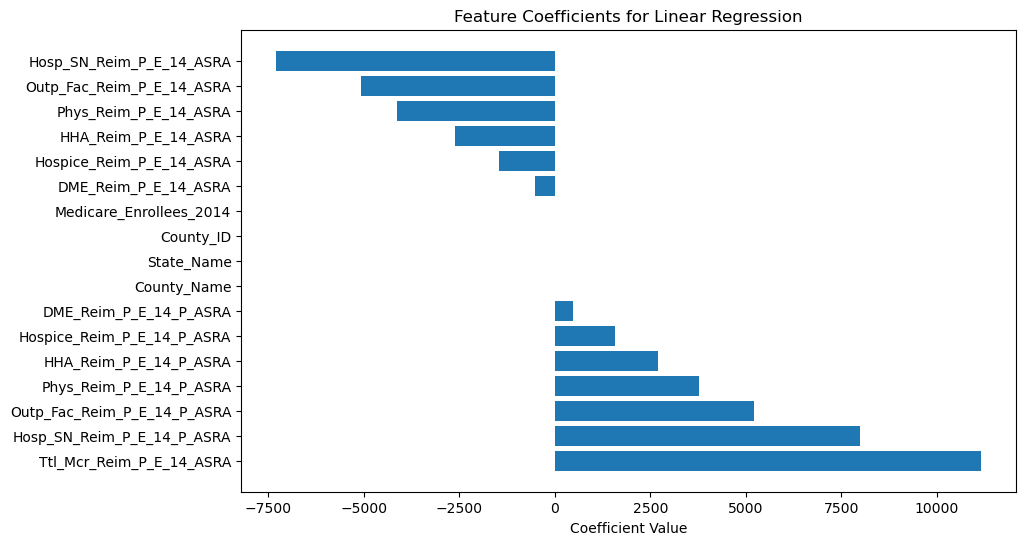

In [68]:
#visualize
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients for Linear Regression')
plt.show()

**Important Features**:
- Total Medicare Reimbursements per Enrollee (Ttl_Mcr_Reim_P_E_14_ASRA) has the strongest positive influence on the target variable.
- Hospital Skilled Nursing Reimbursement (Hosp_SN_Reim_P_E_14_P_ASRA) is another significant factor contributing to higher total costs.
- Outpatient Facility Reimbursement (Outp_Fac_Reim_P_E_14_P_ASRA),<br>
  Physician Reimbursement (Phys_Reim_P_E_14_P_ASRA), and <br>
  Home Health Agency Reimbursement (HHA_Reim_P_E_14_P_ASRA) also have positive relationships with total costs, but their influence is weaker compared to the top three features.

**Less Important Features**:
- County-level characteristics like County_Name, State_Name, and County_ID have minimal impact on total reimbursements.
- Medicare_Enrollees_2014 shows a weak negative relationship with total costs, requiring further investigation.
- Certain reimbursement variables like DME and Hospice have negative coefficients, potentially indicating an inverse relationship with overall costs that needs further exploration.

**Overall**: <br>
This analysis highlights the **importance of healthcare spending in specific areas like skilled nursing, outpatient facilities, physicians, and home health agencies as potential drivers of variations in total Medicare reimbursements across counties.**

## Conclusion

- **Linear regression** effectively predicts Medicare reimbursements (high R-squared).
- Key factors influencing costs:
    - Hospital skilled nursing reimbursements
    - Outpatient facility reimbursements
    - Physician reimbursements
    - Home health agency reimbursements

This analysis provides valuable insights for understanding and potentially managing variations in Medicare costs across counties.

## Saving Model

In [69]:
import joblib

In [70]:
joblib.dump(lr, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [71]:
loaded_model = joblib.load('linear_regression_model.pkl')